In [1]:
from sympy import init_printing; init_printing();
from sympy import symbols, sin, cos, tan, acos, sqrt, Eq, Function, Array
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols, RiemannCurvatureTensor

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # display all expression in one cell instead of the last one

## Cylindrical Coordinates

Transform Relation from $(r, \theta, \phi)$ to $(x, y, z)$:

\begin{equation}
\left\{\begin{matrix}
x =& R &\sin\phi \\ 
y =& R &\sin\phi \\ 
z =& Z &
\end{matrix}\right.
\end{equation}

Transform Relation from $(x, y, z)$ to $(r, \theta, \phi)$:
\begin{equation}
\left\{\begin{matrix}
 & R^2 =& x^2+y^2 & \\ 
 & Z =& z & \\ 
\tan & \phi  =& y/x & \text{(Many programming languages have atan2(y, x) to avoid the singularities)}
\end{matrix}\right.
\end{equation}

In [4]:
R, Z, phi = symbols('R Z phi', real=True)
x, y, z = [f(R, Z, phi) for f in symbols('x, y, z', real=True, cls=Function)]

In [5]:

eq_list = [
    Eq(x, R * cos(phi)),
    Eq(y, R * sin(phi)),
    Eq(z, Z)]
for eq in eq_list: eq
diffed_eq_list = []
for eq in eq_list:
    for var in [R, Z, phi]:
        diffed_eq_list.append(
            Eq(eq.lhs.diff(var),
               eq.rhs.diff(var)))# .subs(x**2+y**2+z**2, r**2).simplify() )

/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: Matpl

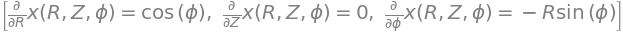

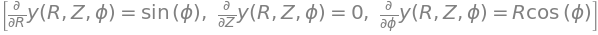

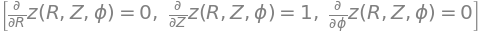

In [22]:
[eq for eq in diffed_eq_list[0:3]]
[eq for eq in diffed_eq_list[3:6]]
[eq for eq in diffed_eq_list[6:9]]

\begin{equation}
\vec{r}_{1} = \frac{\partial \vec{r}}{\partial R} = \frac{\partial (x\hat{x}+y\hat{y}+z\hat{z})}{\partial R},\quad
\vec{r}_{2} = \frac{\partial \vec{r}}{\partial Z} = \frac{\partial (x\hat{x}+y\hat{y}+z\hat{z})}{\partial Z},\quad
\vec{r}_{3} = \frac{\partial \vec{r}}{\partial \phi} = \frac{\partial (x\hat{x}+y\hat{y}+z\hat{z})}{\partial \phi}
\end{equation}

In [8]:
from einsteinpy.symbolic.vector import GenericVector

r_i = [None, None, None] # The three components would be 
for i, var in enumerate([R, Z, phi]):
    r_i_temp = Array([x.diff(var), y.diff(var), z.diff(var)])
    for eq in diffed_eq_list:
        r_i_temp = r_i_temp.subs(eq.lhs, eq.rhs)
    r_i[i] = r_i_temp

In [14]:
from sympy import trigsimp
# define the metric for 3d spherical coordinates
metric = [[0 for i in range(3)] for i in range(3)]
for i in range(3):
    for j in range(3):
        metric[i][j] = (lambda vec1, vec2: 
                        vec1[0]*vec2[0] + vec1[1]*vec2[1] + vec1[2]*vec2[2])(r_i[i], r_i[j])
        metric[i][j] = trigsimp(metric[i][j])
        # metric[i][j]
# creating metric object
m_obj = MetricTensor(metric, (R, Z, phi), config='ll')
m_obj.tensor()

⎡1  0  0 ⎤
⎢        ⎥
⎢0  1  0 ⎥
⎢        ⎥
⎢       2⎥
⎣0  0  R ⎦

In [15]:
ch = ChristoffelSymbols.from_metric(m_obj)
ch.config

'ull'

In [16]:
# Calculating Riemann Tensor from Christoffel Symbols
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎤
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎣⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎦

In [17]:
# Calculating Riemann Tensor from Metric Tensor
rm2 = RiemannCurvatureTensor.from_metric(m_obj)
rm2.tensor()

⎡⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎤
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎣⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎦